In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylcs
from scipy import stats

/tmp/ipykernel_13167/2460710272.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('results_experiment_similarity_thousand.csv')
df

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,error
0,964152,0,0.410959,0.718954,0.568266,0.564957,0.522979,0.410959,0.718954,NaN
1,964152,1,0.331288,0.817337,0.680556,0.574313,0.471475,0.331288,0.817337,NaN
2,964152,2,0.983607,0.244344,0.290323,0.613975,0.391446,0.244344,0.983607,NaN
3,964152,3,0.289017,0.852853,0.758389,0.570935,0.431729,0.289017,0.852853,NaN
4,964152,4,0.550459,0.490706,0.564103,0.520583,0.518868,0.490706,0.550459,NaN
...,...,...,...,...,...,...,...,...,...,...
4976503,1392173,2,0.905923,0.996540,0.960000,0.951232,0.949073,0.905923,0.996540,NaN
4976504,1392173,3,0.956522,0.870432,0.910256,0.913477,0.911448,0.870432,0.956522,NaN
4976505,1392173,4,0.949833,0.956811,1.000000,0.953322,0.953309,0.949833,0.956811,NaN
4976506,1392173,5,0.665116,0.666667,0.650113,0.665891,0.665891,0.665116,0.666667,NaN


In [3]:
selected_chunks = pd.read_csv('data/chunk_ids_list.csv')
df = df[df['chunk_id'].isin(selected_chunks['chunk_id'].unique())]
df

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,error
0,964152,0,0.410959,0.718954,0.568266,0.564957,0.522979,0.410959,0.718954,NaN
1,964152,1,0.331288,0.817337,0.680556,0.574313,0.471475,0.331288,0.817337,NaN
2,964152,2,0.983607,0.244344,0.290323,0.613975,0.391446,0.244344,0.983607,NaN
3,964152,3,0.289017,0.852853,0.758389,0.570935,0.431729,0.289017,0.852853,NaN
4,964152,4,0.550459,0.490706,0.564103,0.520583,0.518868,0.490706,0.550459,NaN
...,...,...,...,...,...,...,...,...,...,...
4976503,1392173,2,0.905923,0.996540,0.960000,0.951232,0.949073,0.905923,0.996540,NaN
4976504,1392173,3,0.956522,0.870432,0.910256,0.913477,0.911448,0.870432,0.956522,NaN
4976505,1392173,4,0.949833,0.956811,1.000000,0.953322,0.953309,0.949833,0.956811,NaN
4976506,1392173,5,0.665116,0.666667,0.650113,0.665891,0.665891,0.665116,0.666667,NaN


In [4]:
df_attributes = pd.read_csv('data/resolution_composition.csv')
df_attributes = df_attributes[df_attributes['chunk_id'].isin(df['chunk_id'].unique())]
df_attributes

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13432,1652324,0.50,0.50,0.50,0.50,0.00,v1 v2,0,1,0.00,50.00,1,2,1.0
13433,1652325,0.50,0.50,0.50,0.50,0.00,v2 v1,1,1,50.00,50.00,2,2,0.0
13566,1658634,0.71,0.71,0.50,0.50,0.43,v2 (v1_2) v1 (v1_2) v2,2,0,28.57,0.00,7,5,-2.0
13567,1658665,0.50,0.50,0.50,0.50,0.00,v2 v1,1,1,50.00,50.00,2,2,0.0


In [5]:
df_chunk_details = pd.read_csv('data/dataset_details.csv')
df_chunk_details = df_chunk_details[df_chunk_details['chunk_id'].isin(df['chunk_id'].unique())]
df_chunk_details

,chunk_id,chunk_size,solution_size,candidate_size,chunk_size_char,solution_size_char,candidate_size_char,v1_size_char,v2_size_char
0,776662,18,12,14,985,632,762,390,595
1,776782,113,101,47,4004,3136,1644,1890,2114
2,776793,6,5,3,331,275,204,269,62
3,776828,5,3,0,232,136,0,126,106
4,776863,6,5,4,140,96,99,51,89
...,...,...,...,...,...,...,...,...,...
10648,1652324,3,2,1,142,79,63,66,76
10649,1652325,4,2,1,191,82,40,112,79
10771,1658634,13,7,8,468,270,256,254,214
10772,1658665,4,3,3,159,80,113,74,85


In [6]:
df_dataset = pd.read_csv('data/INITIAL_DATASET.csv')
df_dataset = df_dataset[df_dataset['chunk_id'].isin(df['chunk_id'].unique())]
df_dataset

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
1,776662,Combination,80,100,87,"If statement, Method invocation, Return statem...",https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,3scale/3scale_ws_api_for_java/src/net/threesca...,Api2Impl.java,332b6ed4e324199565e235cd915368f9bc1b43d2,4650578dee712b2b08f2ead2bf6a531f82b1e0e9,d623f491daa2f14f06f53338265d28a489138a6b,1d2ec0a2016edab9736e163e09d7a994af00ccbf
15,776782,Combination,77,193,123,"Attribute, Comment, If statement, Method decla...",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,cwensel/cascading/cascading-core/src/main/java...,ProcessEdge.java,b9e82842917f541594a67c44639201895caa4b28,ab3c048f47c6390ea1b6e42d09055f70938ae1ee,47ead800f9bbc26abd1b63016824ee72ff036eda,3adb2f6dd0ea442facd89869e237887c432c6795
16,776793,Combination,914,922,920,"Attribute, Method invocation",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,cwensel/cascading/cascading-hadoop2-tez/src/ma...,Hadoop2TezFlowStep.java,b9e82842917f541594a67c44639201895caa4b28,ab3c048f47c6390ea1b6e42d09055f70938ae1ee,47ead800f9bbc26abd1b63016824ee72ff036eda,3adb2f6dd0ea442facd89869e237887c432c6795
22,776828,Combination,295,302,299,Method invocation,https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,cwensel/cascading/cascading-core/src/main/java...,FlowStepJob.java,bcd0ef81a0a8b9f64ea644e434d299585b4dbc75,a4a5911370c64c9454464dd326524671ba8e823c,f4ee1f4e73af1987f740b97a1b2b01e6cf2b025a,aa4f237bf48f4cee9d11a6fd8d41c419f53d600f
48,776863,Combination,136,144,138,"Method signature, Static initializer",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,cwensel/cascading/cascading-core/src/main/java...,FlowPlanner.java,30c4b21552ad0db4e3ed3fe8dfed3e702945851a,4af71d950d9bd405dd3523f01d786873bf4aa9a8,aa4f237bf48f4cee9d11a6fd8d41c419f53d600f,23833acf9569c512710cf688066988f06a3459f1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173521,1652324,Combination,275,280,277,"Method signature, Try statement",https://github.com/gronnbeck/java-cluster-api,gronnbeck/java-cluster-api,gronnbeck,java-cluster-api,gronnbeck/java-cluster-api/src/system/SpaceImp...,SpaceImpl.java,fa8803d85fdd4495b0e475a87adcb7a0d64dcc4e,5653c5215d2d28b2823ca667716fbf26f153ca9b,700ffbf136aabde825b017aa87d8d76d20d12f69,5d490127d43161e3afe5ddab3dfa00da0b396199
173524,1652325,Combination,85,91,88,"If statement, Variable",https://github.com/gronnbeck/java-cluster-api,gronnbeck/java-cluster-api,gronnbeck,java-cluster-api,gronnbeck/java-cluster-api/src/system/WorkStea...,WorkStealer.java,fa8803d85fdd4495b0e475a87adcb7a0d64dcc4e,5653c5215d2d28b2823ca667716fbf26f153ca9b,700ffbf136aabde825b017aa87d8d76d20d12f69,5d490127d43161e3afe5ddab3dfa00da0b396199
175600,1658634,Combination,47,62,56,Attribute,https://github.com/xargsgrep/PortKnocker,xargsgrep/PortKnocker,xargsgrep,PortKnocker,xargsgrep/PortKnocker/app/src/main/java/com/xa...,MiscFragment.java,5835fb27160180763dd94f1bcc3f793a1e18c756,d167d1bfe398b0d7066a4ba2fed2c5e6c5647d92,ee3ba1641ccf56a03aea4b86f819068d48b24a3f,9edcb3fd8869082e0759e6715f3c05656f7ddd58
175687,1658665,Combination,9,15,12,Attribute,https://github.com/mseiwert/RoM,mseiwert/RoM,mseiwert,RoM,mseiwert/RoM/RoM-Server/src/com/rom/server/con...,Config.java,fa4b36ef85026af9b66c3fbad66224e7b657e107,17fc48e2753cf7ac5817fa23ba6beece64c1748d,7dbd3b572c76c6472cbbe1461687a1c154afd6bb,f65bee290e49b09dcb49647d18beb51d3b9d917b


In [7]:
df.error.unique()

array([nan])

In [8]:
df = df.merge(df_attributes)
df = df.merge(df_chunk_details)

In [9]:
df

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,error,...,v2_size,chunk_size_delta,chunk_size,solution_size,candidate_size,chunk_size_char,solution_size_char,candidate_size_char,v1_size_char,v2_size_char
0,964152,0,0.410959,0.718954,0.568266,0.564957,0.522979,0.410959,0.718954,NaN,...,5,4.0,6,4,4,216,153,163,30,186
1,964152,1,0.331288,0.817337,0.680556,0.574313,0.471475,0.331288,0.817337,NaN,...,5,4.0,6,4,4,216,153,163,30,186
2,964152,2,0.983607,0.244344,0.290323,0.613975,0.391446,0.244344,0.983607,NaN,...,5,4.0,6,4,4,216,153,163,30,186
3,964152,3,0.289017,0.852853,0.758389,0.570935,0.431729,0.289017,0.852853,NaN,...,5,4.0,6,4,4,216,153,163,30,186
4,964152,4,0.550459,0.490706,0.564103,0.520583,0.518868,0.490706,0.550459,NaN,...,5,4.0,6,4,4,216,153,163,30,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509335,1392173,2,0.905923,0.996540,0.960000,0.951232,0.949073,0.905923,0.996540,NaN,...,2,1.0,3,2,2,285,155,156,142,143
4509336,1392173,3,0.956522,0.870432,0.910256,0.913477,0.911448,0.870432,0.956522,NaN,...,2,1.0,3,2,2,285,155,156,142,143
4509337,1392173,4,0.949833,0.956811,1.000000,0.953322,0.953309,0.949833,0.956811,NaN,...,2,1.0,3,2,2,285,155,156,142,143
4509338,1392173,5,0.665116,0.666667,0.650113,0.665891,0.665891,0.665116,0.666667,NaN,...,2,1.0,3,2,2,285,155,156,142,143


In [10]:
rows = 10
columns = 5

In [11]:
list(df.sample(rows * columns, random_state=4032024)['chunk_id'])

[1144775,
 1416835,
 938923,
 964264,
 936889,
 936841,
 921187,
 1609305,
 1087044,
 1406277,
 801693,
 1367973,
 1301508,
 1052385,
 826984,
 816223,
 1173505,
 781128,
 1025656,
 972305,
 1020386,
 1145546,
 825667,
 976037,
 1050065,
 1099985,
 967242,
 1601463,
 1401254,
 1159546,
 1156985,
 818315,
 840208,
 840972,
 1473380,
 962523,
 1037714,
 1110783,
 1417471,
 832872,
 1339319,
 995069,
 934725,
 1015523,
 933437,
 1362708,
 795896,
 921781,
 1367682,
 1296840]

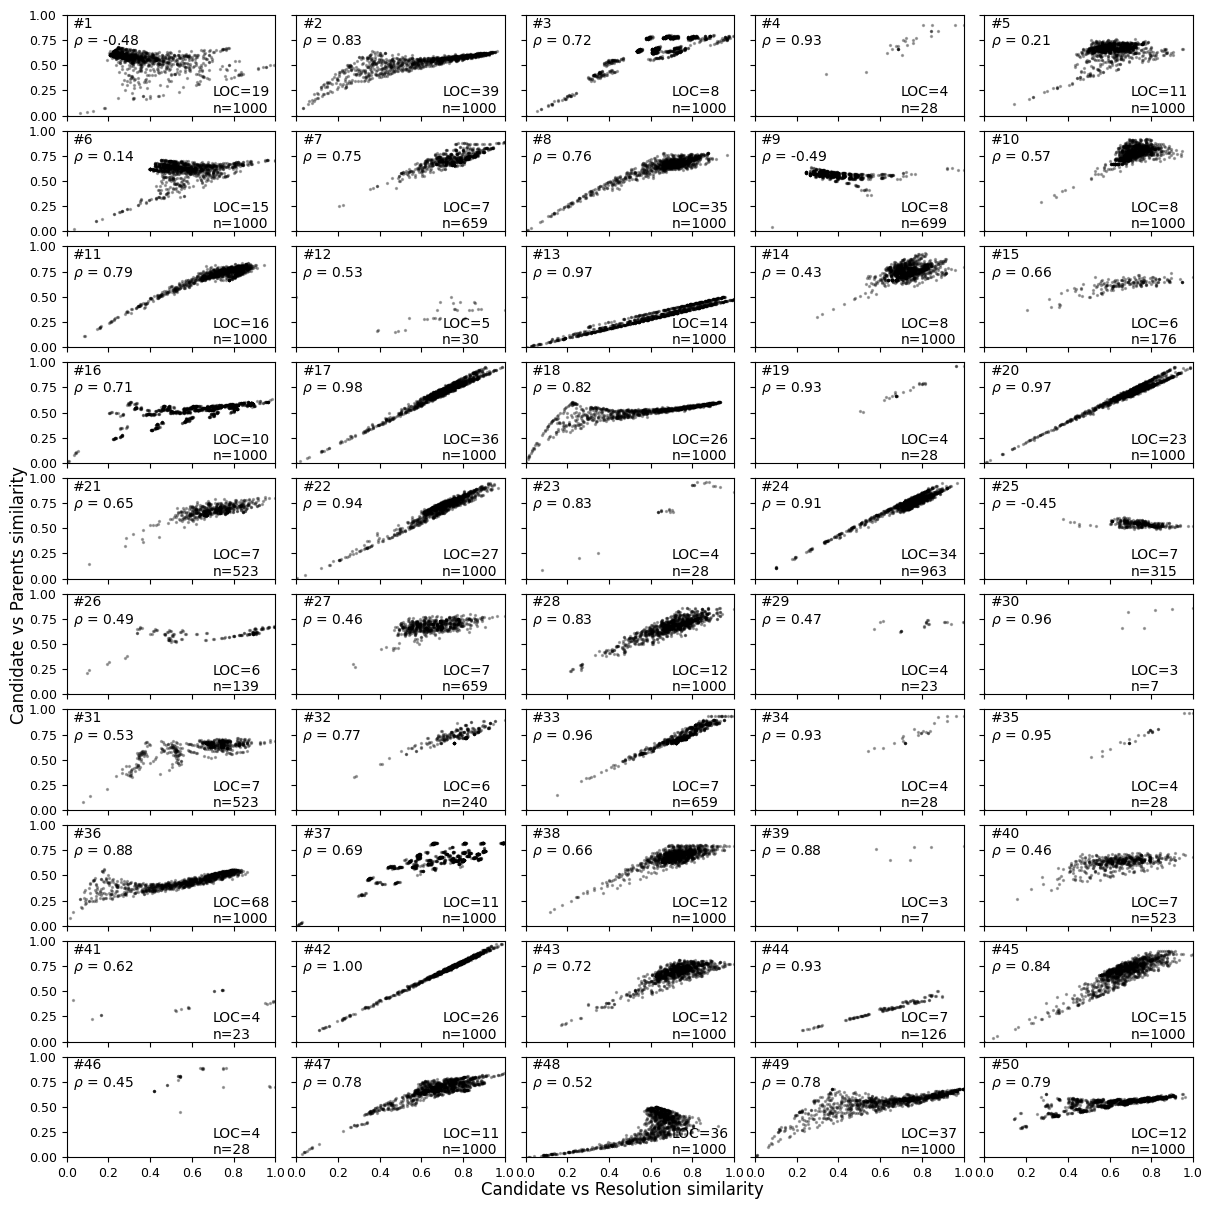

In [12]:
# only significant correlations included

chunk_ids = df_attributes.sample(frac=1, random_state=4032024).chunk_id.unique()
sample = []

fig, axs = plt.subplots(rows, columns, figsize=(12, 12))

chunk_number = 1
current_chunk_index = 19


for i in range(rows):
    for j in range(columns):
        p_value = 1
        while pd.isna(p_value) or p_value >= 0.05:
            chunk_id = chunk_ids[current_chunk_index]
            current_chunk_index+=1
            df_chunk = df[df['chunk_id']==chunk_id]

            correlation, p_value = stats.spearmanr(df_chunk['solution_gestalt_sim'], df_chunk['aggregate_mean_gestalt'])
            if not pd.isna(p_value) and p_value < 0.05:
                axs[i, j].scatter(df_chunk['solution_gestalt_sim'], df_chunk['aggregate_mean_gestalt'], marker='.', c='k', s=8, alpha=.3)
                axs[i, j].set_ylim([0,1])
                axs[i, j].set_xlim([0,1])
                chunk_size = df_chunk.iloc[0]['chunk_size']
                chunk_id = int(df_chunk.iloc[0]['chunk_id'])
                sample.append([chunk_id, correlation])
                correlation_text = plt.annotate("#{}\n$\\rho$ = {:.2f}".format(chunk_number,correlation), xy=(0.0,1), xycoords=axs[i,j].transAxes, xytext=(0.03,0.70), textcoords=axs[i,j].transAxes)
                n_text = plt.annotate("LOC={}\nn={}".format(chunk_size,len(df_chunk)), xy=(0.0,1), xycoords=axs[i,j].transAxes, xytext=(0.70,0.03), textcoords=axs[i,j].transAxes)
                correlation_text.set_in_layout(False)
                n_text.set_in_layout(False)
                chunk_number+=1

for i in range(rows):
    for j in range(columns):
        if j != 0:
            axs[i, j].set_yticklabels([])
        if i != rows - 1:
            axs[i, j].set_xticklabels([])        
        
for ax in axs.flat:
    ax.tick_params(axis='both', labelsize=9)

    
fig.text(-0.01, 0.5, 'Candidate vs Parents similarity', va='center', rotation='vertical', fontsize=12)
fig.text(0.5, 0, 'Candidate vs Resolution similarity', ha='center', rotation='horizontal', fontsize=12)
    
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, wspace=0.1)
plt.savefig('figures/RQ5_scatter_5x10.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [13]:
df_sample = pd.DataFrame(sample, columns=['chunk_id', 'correlation'])
df_sample

,chunk_id,correlation
0,1413339,-0.478291
1,1063228,0.834249
2,978723,0.721591
3,1420605,0.928660
4,1017619,0.207633
5,825680,0.139232
6,1189263,0.749111
7,993240,0.760244
8,1152634,-0.487245
9,1064861,0.568315


In [14]:
median = df_sample['correlation'].quantile(0.5)
q1 = df_sample['correlation'].quantile(0.25)
q3 = df_sample['correlation'].quantile(0.75)
IQR = q3 - q1
lower_whiskers = 1.5 * IQR - q1
upper_whiskers = 1.5 * IQR + q3
upper_whiskers = 1 if upper_whiskers > 1 else upper_whiskers

print(f"Lower: {lower_whiskers:.3f}")
print(f"Q1: {q1:.3f}")
print(f"Median: {median:.3f}")
print(f"Q3: {q3:.3f}")
print(f"Upper: {upper_whiskers:.3f}")

Lower: 0.037
Q1: 0.529
Median: 0.763
Q3: 0.906
Upper: 1.000


### Correlation


In [15]:
data = []
columns=['chunk_id', 'spearman_correlation', 'p-value']
for chunk_id in df['chunk_id'].unique():
    df_chunk = df[df['chunk_id']==chunk_id]
    correlation, p_value = stats.spearmanr(df_chunk['solution_gestalt_sim'], df_chunk['aggregate_mean_gestalt'])
    data.append([chunk_id, correlation, p_value])

/tmp/ipykernel_13167/4142174434.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = stats.spearmanr(df_chunk['solution_gestalt_sim'], df_chunk['aggregate_mean_gestalt'])


In [16]:
df_corr = pd.DataFrame(data, columns=columns)
df_corr

,chunk_id,spearman_correlation,p-value
0,964152,0.556914,1.083528e-12
1,783308,0.982248,0.000000e+00
2,825766,0.618330,1.662218e-03
3,1166841,0.460164,1.488592e-53
4,1137463,0.474211,3.702933e-09
...,...,...,...
9993,1164578,0.737135,4.550487e-172
9994,804284,-0.746352,8.834658e-02
9995,1136584,0.728719,2.753834e-166
9996,777957,0.945611,1.286653e-03


In [17]:
df_corr_cleaned = df_corr.dropna()
df_corr_cleaned

,chunk_id,spearman_correlation,p-value
0,964152,0.556914,1.083528e-12
1,783308,0.982248,0.000000e+00
2,825766,0.618330,1.662218e-03
3,1166841,0.460164,1.488592e-53
4,1137463,0.474211,3.702933e-09
...,...,...,...
9993,1164578,0.737135,4.550487e-172
9994,804284,-0.746352,8.834658e-02
9995,1136584,0.728719,2.753834e-166
9996,777957,0.945611,1.286653e-03


/tmp/ipykernel_13167/2777971427.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr_cleaned['category'] = pd.cut(df_corr_cleaned['spearman_correlation'], bins=bins, labels=categories, include_lowest=True, ordered=False)
/tmp/ipykernel_13167/2777971427.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(counts.index, rotation=45, ha='right')
/tmp/ipykernel_13167/2777971427.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(counts_significant.index, rotation=45, ha='right')


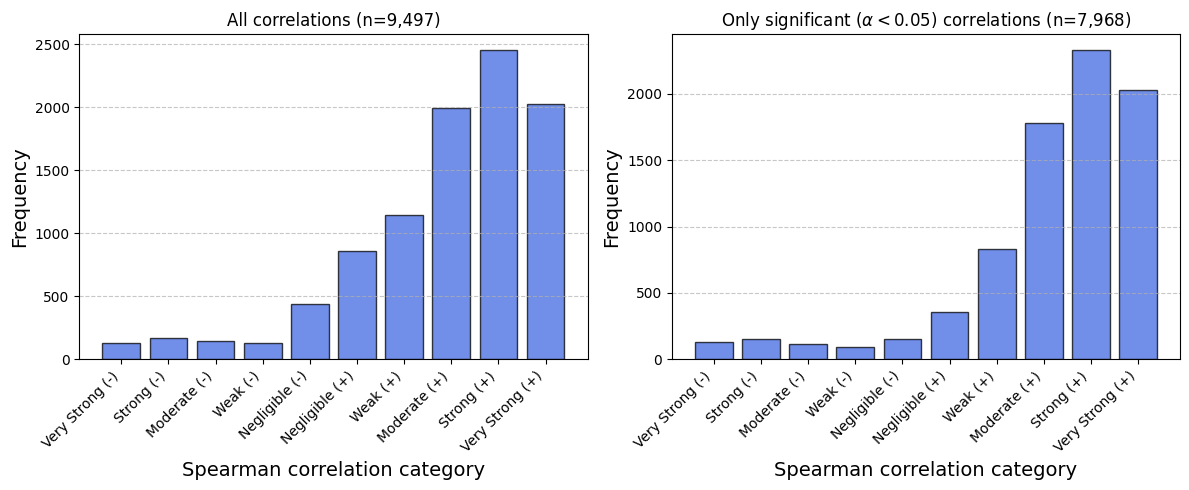

In [18]:
bins = [-1.0, -0.9, -0.7, -0.5, -0.3, 0, 0.3, 0.5, 0.7, 0.9, 1.0]
categories = ["Very Strong (-)", "Strong (-)", "Moderate (-)", "Weak (-)", "Negligible (-)",  
              "Negligible (+)", "Weak (+)", "Moderate (+)", "Strong (+)", "Very Strong (+)"]

df_corr_cleaned['category'] = pd.cut(df_corr_cleaned['spearman_correlation'], bins=bins, labels=categories, include_lowest=True, ordered=False)

counts = df_corr_cleaned['category'].value_counts().reindex(categories, fill_value=0)

df_significant = df_corr_cleaned[df_corr_cleaned['p-value'] < 0.05]
counts_significant = df_significant['category'].value_counts().reindex(categories, fill_value=0)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))


axs[0].bar(counts.index, counts.values, color='royalblue', edgecolor='black', alpha=0.75)
axs[0].set_xlabel("Spearman correlation category", fontsize=14)
axs[0].set_ylabel("Frequency", fontsize=14)
axs[0].set_xticklabels(counts.index, rotation=45, ha='right')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].set_title(f"All correlations (n={len(df_corr_cleaned):,})")


axs[1].bar(counts_significant.index, counts_significant.values, color='royalblue', edgecolor='black', alpha=0.75)
axs[1].set_xlabel("Spearman correlation category", fontsize=14)
axs[1].set_ylabel("Frequency", fontsize=14)
axs[1].set_xticklabels(counts_significant.index, rotation=45, ha='right')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].set_title(f"Only significant ($\\alpha<0.05$) correlations (n={len(df_significant):,})")

plt.tight_layout()
plt.show()

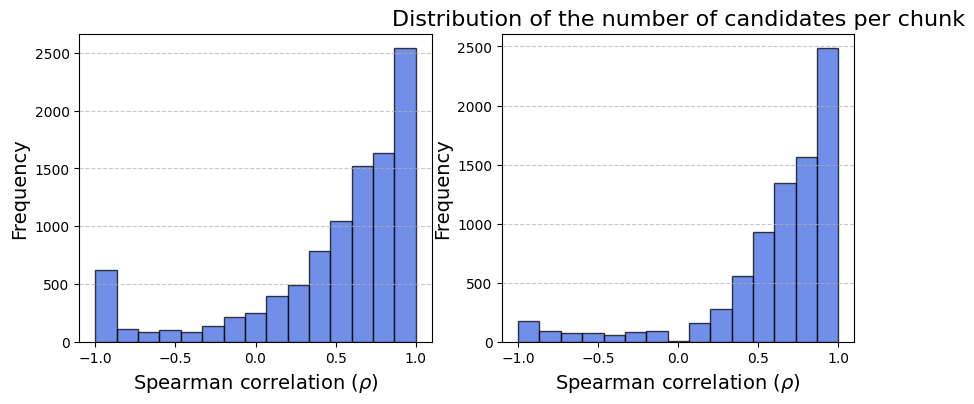

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(df_corr['spearman_correlation'], bins=15, color='royalblue', edgecolor='black', alpha=0.75)
axs[0].set_xlabel("Spearman correlation ($\\rho$)", fontsize=14)
axs[0].set_ylabel("Frequency", fontsize=14)
plt.title("Distribution of the number of candidates per chunk", fontsize=16)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)


axs[1].hist(df_corr[df_corr['p-value']<0.05]['spearman_correlation'], bins=15, color='royalblue', edgecolor='black', alpha=0.75)
axs[1].set_xlabel("Spearman correlation ($\\rho$)", fontsize=14)
axs[1].set_ylabel("Frequency", fontsize=14)
# plt.title("Distribution of the number of candidates per chunk", fontsize=16)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# plt.yscale('log')

plt.show()

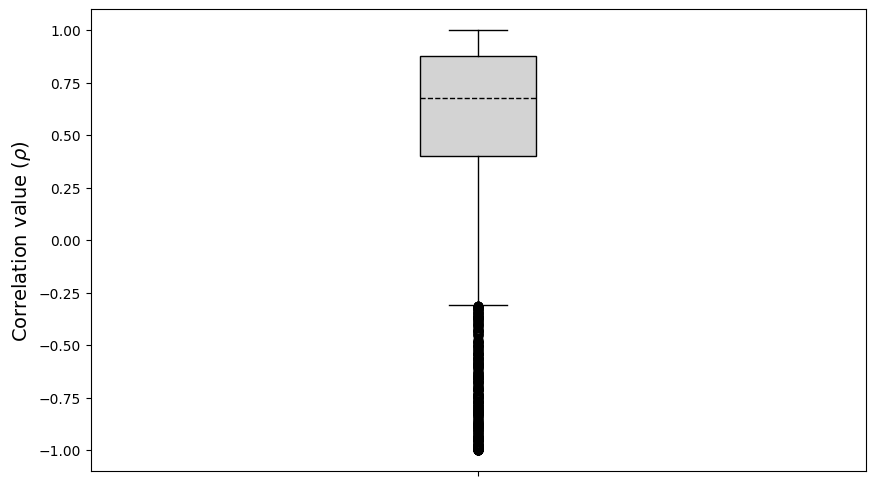

In [20]:
plt.figure(figsize=(10, 6))  
plt.boxplot([df_corr_cleaned['spearman_correlation']], 
            patch_artist=True,  # To fill the box with color
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  # Color of the median line
            boxprops=dict(facecolor='lightgray', color='black'),  # Color of the box
            whiskerprops=dict(color='black'),  # Color of the whiskers
            capprops=dict(color='black'),  # Color of the caps
            showfliers=True)  # Properties of the outliers

plt.ylabel('Correlation value ($\\rho$)', fontsize=14)
plt.xticks([1], [''], fontsize=14)
# plt.title('Similarity level between random candidates and each target', fontsize=16)

# plt.savefig('figures/RQ2_boxplot.png', dpi=300)  # Save the plot as a PNG file with higher resolution
plt.show() 

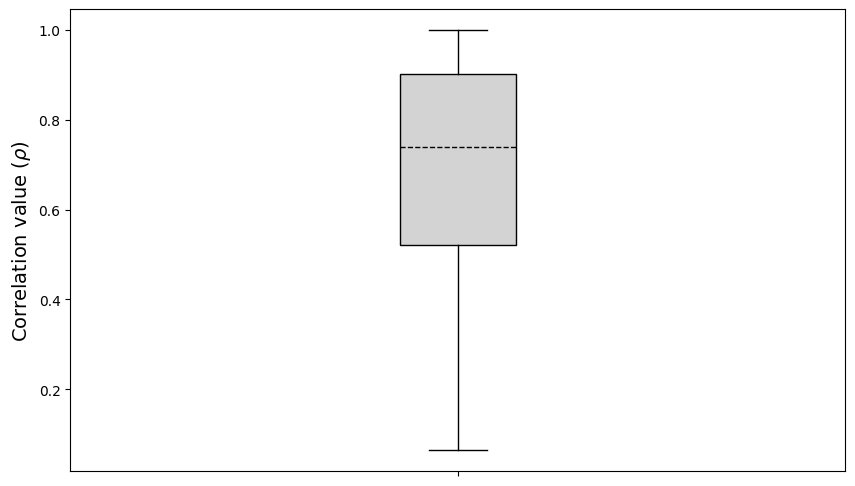

In [21]:
plt.figure(figsize=(10, 6))  
plt.boxplot([df_significant['spearman_correlation']], 
            patch_artist=True,  # To fill the box with color
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  # Color of the median line
            boxprops=dict(facecolor='lightgray', color='black'),  # Color of the box
            whiskerprops=dict(color='black'),  # Color of the whiskers
            capprops=dict(color='black'),  # Color of the caps
            showfliers=False)  # Properties of the outliers

plt.ylabel('Correlation value ($\\rho$)', fontsize=14)
plt.xticks([1], [''], fontsize=14)
# plt.title('Similarity level between random candidates and each target', fontsize=16)

# plt.savefig('figures/RQ2_boxplot.png', dpi=300)  # Save the plot as a PNG file with higher resolution
plt.show() 

In [22]:
# calculate min, Q1, median, Q3, max for the significant correlations in the dataset
median = df_significant['spearman_correlation'].quantile(0.5)
q1 = df_significant['spearman_correlation'].quantile(0.25)
q3 = df_significant['spearman_correlation'].quantile(0.75)
IQR = q3 - q1
lower_whiskers = q1 - 1.5 * IQR
upper_whiskers = 1.5 * IQR + q3
print(upper_whiskers)
upper_whiskers = 1 if upper_whiskers > 1 else upper_whiskers

print(f"Lower: {lower_whiskers:.3f}")
print(f"Q1: {q1:.3f}")
print(f"Median: {median:.3f}")
print(f"Q3: {q3:.3f}")
print(f"Upper: {upper_whiskers:.3f}")

1.4736135423831875
Lower: -0.050
Q1: 0.522
Median: 0.739
Q3: 0.902
Upper: 1.000


Select the chunks from the sample of 50 based on the above values

Closest to Lower:

In [23]:
# how may negative correlations?
negative_correlations = df_significant[df_significant['spearman_correlation'] < 0]
negative_correlations

,chunk_id,spearman_correlation,p-value,category
64,985905,-0.178985,1.205075e-08,Negligible (-)
79,778448,-0.345528,2.031038e-29,Weak (-)
97,1059210,-0.554456,3.962438e-02,Moderate (-)
109,1110918,-0.906047,0.000000e+00,Very Strong (-)
114,1270023,-1.000000,0.000000e+00,Very Strong (-)
...,...,...,...,...
9964,975392,-0.766894,1.925779e-194,Strong (-)
9973,932012,-0.606109,2.474046e-101,Moderate (-)
9981,1464308,-0.867201,5.663569e-10,Strong (-)
9987,1296944,-0.144736,1.230350e-04,Negligible (-)


In [24]:
print(f"{len(negative_correlations)/len(df_significant)*100:.1f}% ({len(negative_correlations)}/{len(df_significant)}) of the cases have negative correlation")

8.2% (651/7968) of the cases have negative correlation


### Draft - qualitative analysis

In [25]:
chunk_id = 964302
df_chunk = df[df.chunk_id == chunk_id]
df_chunk[df_chunk['aggregate_mean_gestalt'] > 0.6].sort_values('aggregate_mean_gestalt', ascending=False)
# df_chunk[df_chunk['aggregate_mean_gestalt'] < 0.35].sort_values('aggregate_mean_gestalt')
# df_chunk[(df_chunk['aggregate_mean_gestalt'] >= 0.49) & (df_chunk['aggregate_mean_gestalt'] <= 0.51)]

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,error,...,v2_size,chunk_size_delta,chunk_size,solution_size,candidate_size,chunk_size_char,solution_size_char,candidate_size_char,v1_size_char,v2_size_char
321663,964302,199,0.999711,0.903363,0.970514,0.951537,0.949098,0.903363,0.999711,NaN,...,16,-2.0,34,20,23,3268,1814,2224,1711,1557
321571,964302,107,0.903363,0.999682,0.896916,0.951522,0.949085,0.903363,0.999682,NaN,...,16,-2.0,34,20,23,3268,1814,2224,1711,1557
322349,964302,885,0.877575,0.969772,0.872073,0.923673,0.921373,0.877575,0.969772,NaN,...,16,-2.0,34,20,23,3268,1814,2224,1711,1557
321881,964302,417,0.944444,0.900000,0.915385,0.922222,0.921687,0.900000,0.944444,NaN,...,16,-2.0,34,20,23,3268,1814,2224,1711,1557
321826,964302,362,0.874065,0.969201,0.868357,0.921633,0.919178,0.874065,0.969201,NaN,...,16,-2.0,34,20,23,3268,1814,2224,1711,1557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322063,964302,599,0.615752,0.605598,0.591291,0.610675,0.610633,0.605598,0.615752,NaN,...,16,-2.0,34,20,23,3268,1814,2224,1711,1557
321495,964302,31,0.580542,0.635204,0.557427,0.607873,0.606644,0.580542,0.635204,NaN,...,16,-2.0,34,20,23,3268,1814,2224,1711,1557
321520,964302,56,0.591402,0.621517,0.567682,0.606460,0.606086,0.591402,0.621517,NaN,...,16,-2.0,34,20,23,3268,1814,2224,1711,1557
321865,964302,401,0.576116,0.627992,0.554862,0.602054,0.600936,0.576116,0.627992,NaN,...,16,-2.0,34,20,23,3268,1814,2224,1711,1557


### Selected candidates for each chunk

#### Chunk #6
Chunk id: 825680

Correlation: 0.14

#### Candidates:
- 484 (least similar)
- 83 (50% similarity)
- 256 (most similar)

#### Chunk #31
Chunk id: 792365

Correlation: 0.53

#### Candidates:
- 24 (least similar)
- 206 (50% similarity)
- 165 (most similar)

#### Chunk #7
Chunk id: 1189263

Correlation: 0.75

#### Candidates:
- 26 (least similar)
- 262 (50% similarity)
- 20 (most similar)


#### Chunk #24 (34 lines)
Chunk id: 964302

Correlation: 0.91

#### Candidates:
- 20 (least similar)
- 49 (50% similarity)
- 199 (most similar)

#### Chunk #42
Chunk id: 1400926

Correlation: 1.00

#### Candidates:
- 429 (least similar)
- 154 (50% similarity)
- 30 (most similar)

### Inspect candidate

In [26]:
chunk_id = 783308
candidate_id = 234
file = f"output_RQ5/{chunk_id}_candidate_{int(candidate_id)}.py"
print(file)
with open(file, 'r') as f:
    print(f.read())

output_RQ5/783308_candidate_234.py
                Store<ResolvedModuleVersionResult> newModelCache = storeFactory.createNewModelCache(configuration.getPath());
                ResolutionResultBuilder newModelBuilder = new StreamingResolutionResultBuilder(newModelStore, newModelCache);

                BinaryStore oldModelStore = storeFactory.createBinaryStore("old-model");
                Store<TransientConfigurationResults> oldModelCache = storeFactory.createOldModelCache(configuration.getPath());
                TransientConfigurationResultsBuilder oldTransientModelBuilder = new TransientConfigurationResultsBuilder(oldModelStore, oldModelCache);
                DefaultResolvedConfigurationBuilder oldModelBuilder = new DefaultResolvedConfigurationBuilder(resolvedArtifactFactory, oldTransientModelBuilder);


In [27]:
def get_lcs(text1,text2):
    res = pylcs.lcs_sequence_idx(text1, text2)
    lcs = ''.join([text2[i] for i in res if i != -1])
    return lcs
def get_gestalt(file1_text,file2_text):
    try:
            if file1_text == file2_text:
                return 1
            return 2*len(get_lcs(file1_text, file2_text)) / (len(file1_text) + len(file2_text))
    except Exception as e:
        print(e)
        return 0